# Module67 Decision Tree Assignment1

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

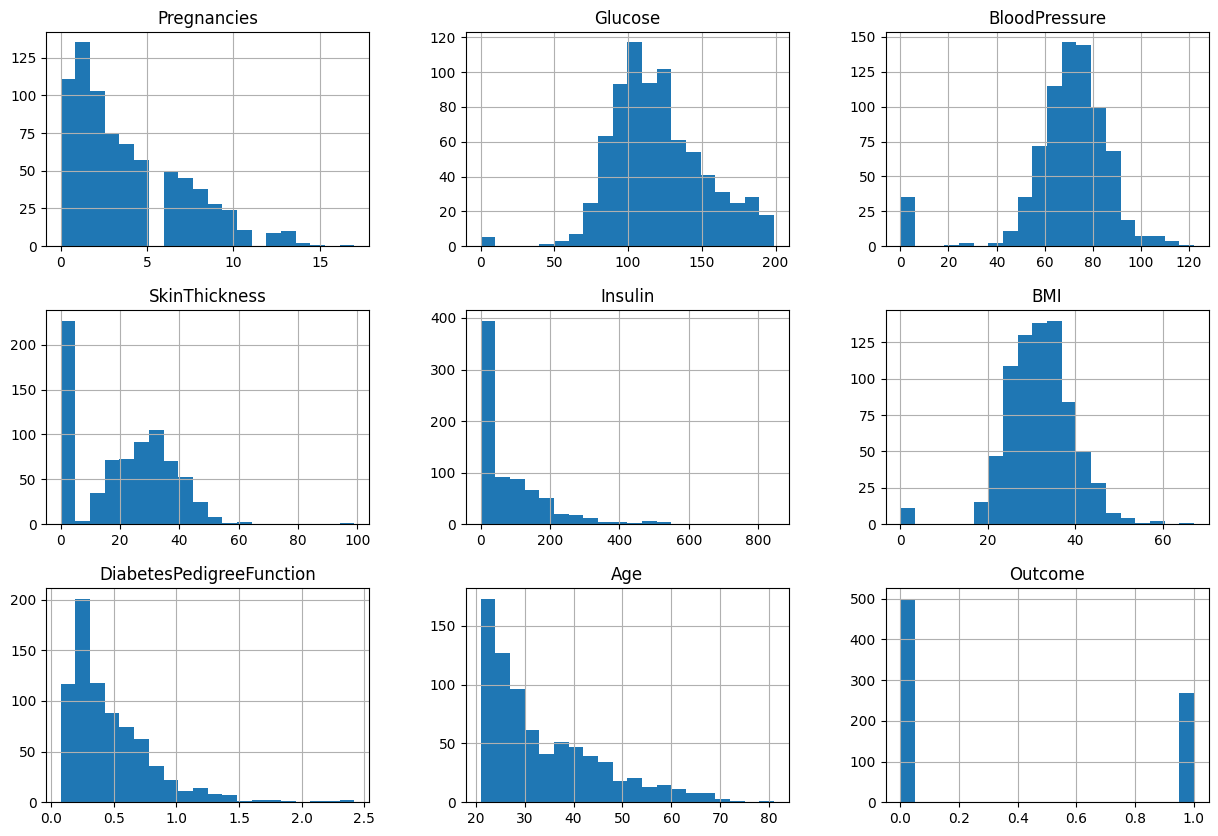

Text(0.5, 1.0, 'Correlation')

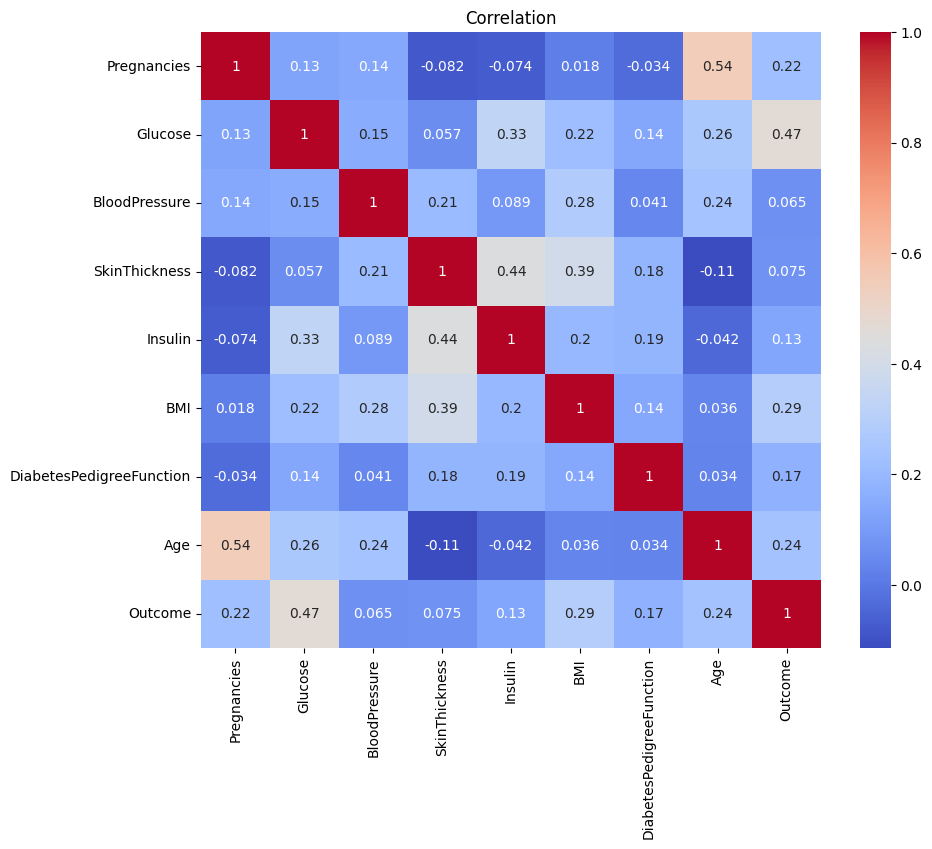

In [3]:
# A1. Step 1: Import the Dataset and Examine the Variables

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for null values
print(data.isnull().sum())

# Visualize variable distributions
data.hist(bins=20, figsize=(15, 10))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation")


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [5]:
# A2. Step2: Preprocess the data.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values (if any)
data = data.dropna()  # Drop rows with missing values

# Optional: Outlier removal (using z-score threshold of 3)
from scipy.stats import zscore
data = data[(zscore(data) < 3).all(axis=1)]

# Separate features and target
X = data.drop(columns=["Outcome"])  # Replace "Outcome" with your target column
y = data["Outcome"]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [7]:
# Step3: Train the Decision Tree.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Initialize the decision tree
tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train with the best parameters
best_tree = grid_search.best_estimator_


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Accuracy: 0.73
Precision: 0.76
Recall: 0.32
F1 Score: 0.45


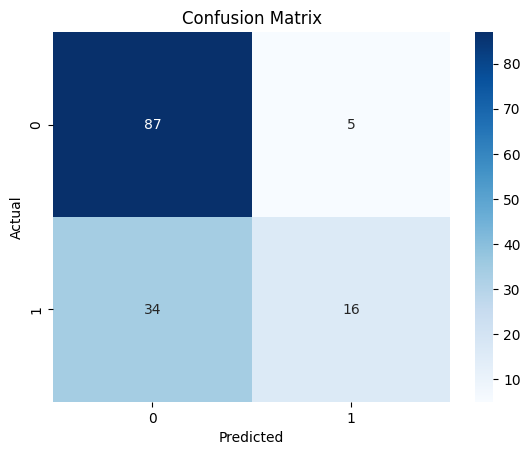

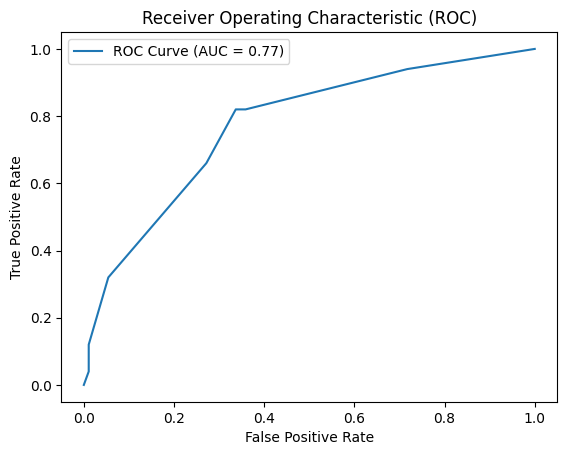

In [8]:
# A4. Evaluate the model.

# Predict on the test set
y_pred = best_tree.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_tree.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.show()



Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

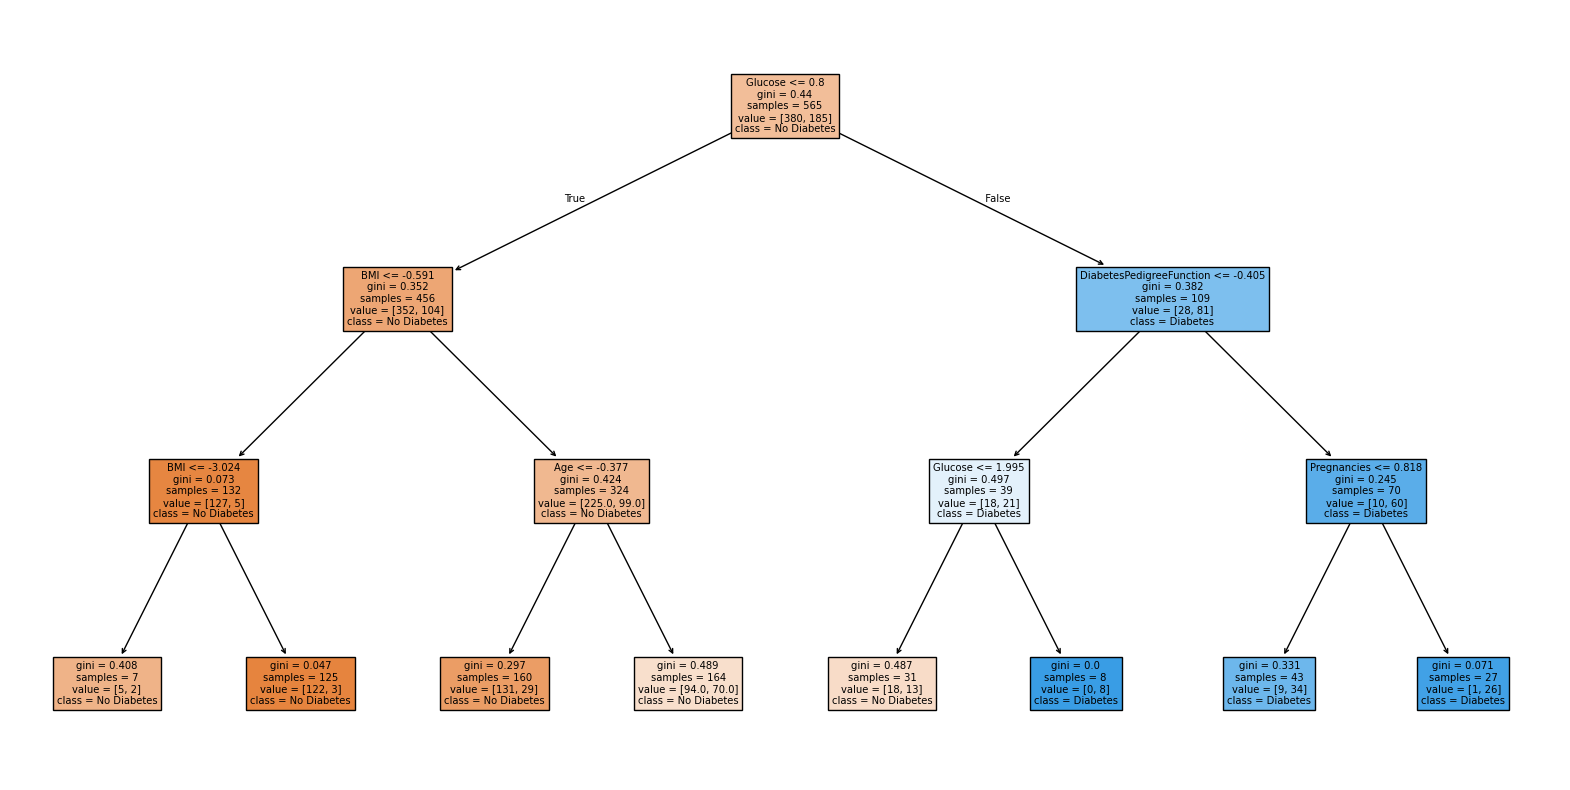

Feature Importance:
                    Feature  Importance
1                   Glucose    0.627991
5                       BMI    0.176812
7                       Age    0.120377
6  DiabetesPedigreeFunction    0.062689
0               Pregnancies    0.012130
2             BloodPressure    0.000000
3             SkinThickness    0.000000
4                   Insulin    0.000000


In [9]:
# A5. Step5: Interpret the Decision tree

from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=data.columns[:-1], class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

# Feature importance
importances = best_tree.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': data.columns[:-1],
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

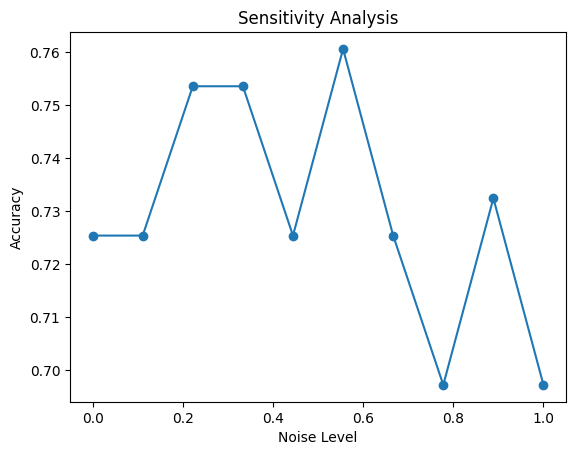

In [10]:
# A6. Step6 - Validate the model

# Test the model's robustness by introducing noise or using different datasets

# Sensitivity analysis
import numpy as np
sensitivity_results = []
for noise in np.linspace(0, 1, 10):
    noisy_X_test = X_test + noise * np.random.normal(size=X_test.shape)
    y_pred_noisy = best_tree.predict(noisy_X_test)
    accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
    sensitivity_results.append((noise, accuracy_noisy))

# Plot sensitivity results
sensitivity_df = pd.DataFrame(sensitivity_results, columns=["Noise Level", "Accuracy"])
plt.plot(sensitivity_df["Noise Level"], sensitivity_df["Accuracy"], marker="o")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy")
plt.title("Sensitivity Analysis")
plt.show()


Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.
Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?

usp=sharing

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!

In [11]:
# A7. Step 7: Save the model

import joblib

# Save the trained decision tree model
joblib.dump(best_tree, "decision_tree_model.pkl")

# Load the model for future use
loaded_model = joblib.load("decision_tree_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!
